# Import Library

In [3]:
import warnings
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split   # For splitting the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report # For model evaluation


# Shows plots in Jupyter Notebook
%matplotlib inline

warnings.filterwarnings('ignore')

Hello


# Loading Dataset

In [5]:
# Importing the Dataset
iris_df = pd.read_csv("Iris_data.csv")

In [6]:
# Displaying the dataset
print('Iris_df shape:', iris_df.shape)
iris_df.head(10)

Iris_df shape: (150, 5)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# 1. Exploratory Data Analysis (EDA)

### Data Info

In [9]:
# Determining the datatypes of the columns of the data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# Determining the number of unique values in the "class" column
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Statistics

In [12]:
# Summarizing our data 
iris_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


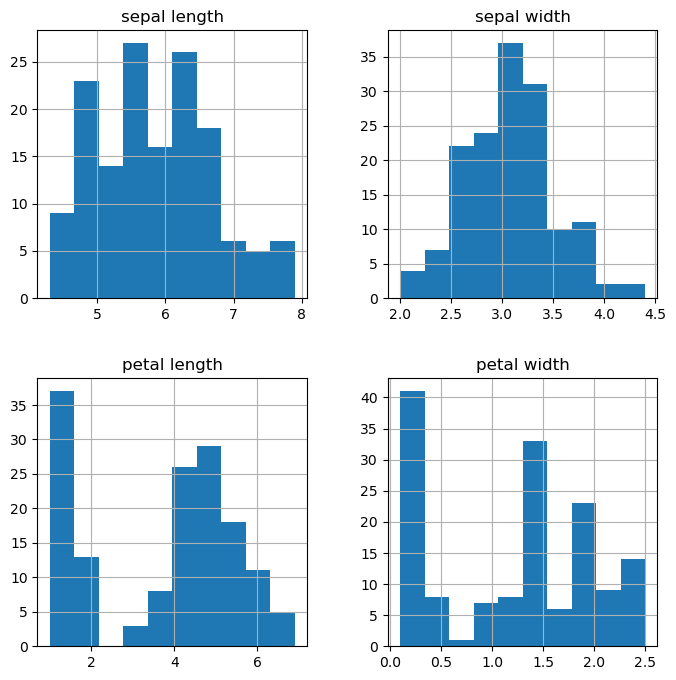

In [13]:
# Plotting a Histogram to visualize the numerical feature distribution
fig, ax = plt.subplots(figsize = (8, 8))
ax = fig.gca()
iris_df.hist(ax = ax)
plt.show()

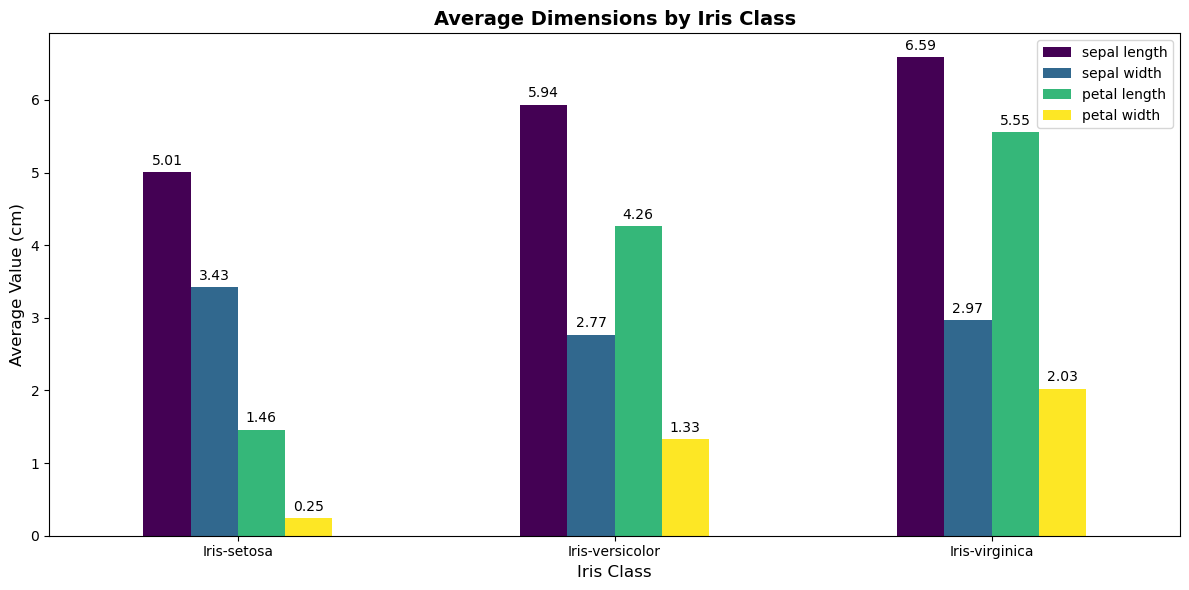

In [14]:
# Representing the Average sepal dimensions of each Iris class
fig, ax = plt.subplots(figsize = (12, 6))

avg_dimensions = iris_df.groupby(['class'])[['sepal length', 'sepal width', 'petal length', 'petal width']].mean()
avg_dimensions.plot(kind='bar', ax=ax, rot=0, cmap='viridis')
ax.set_xlabel('Iris Class', fontsize=12)
ax.set_ylabel('Average Value (cm)', fontsize=12) 
ax.set_title('Average Dimensions by Iris Class', fontsize=14, fontweight='bold') 

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show();

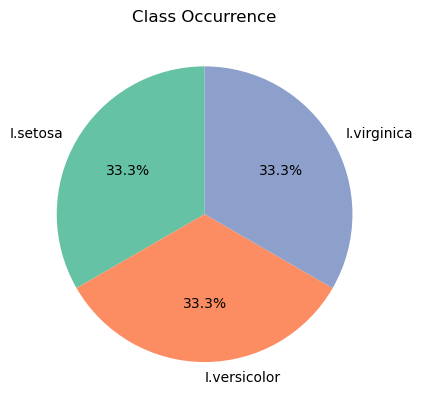

In [15]:
# Representing the class occurrence
class_occurrence = round(iris_df['class'].value_counts(normalize = True) * 100, 2)

# Creating a pie chart
plt.pie(class_occurrence, labels = ['I.setosa', 'I.versicolor', 'I.virginica'], autopct='%1.1f%%', startangle = 90, colors = sns.set_palette('Set2'))
#plt.legend(['I.setosa', 'I.versicolor', 'I.virginica'], title = "Class", loc = 'upper left', bbox_to_anchor = (1, 0, 0.5, 1))
plt.title('Class Occurrence')
plt.show();

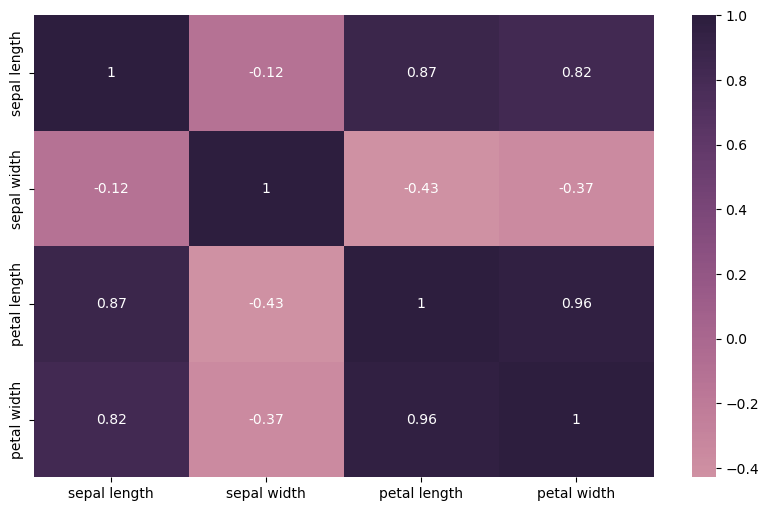

In [16]:
# Correlation Analysis for the three classes
fig, ax = plt.subplots(figsize = (10, 6))

correlation = iris_df.select_dtypes('number').corr()
sns.heatmap(correlation, annot = True, center = 0, linecolor = "black", cmap = sns.cubehelix_palette(as_cmap = True));

There is a strong positive correlation between each feature except the 'sepal width' which has a strong negative correlation between the each feature.

Analyzing the correlation of the three classes separately.

In [18]:
# Correlation for the Iris flower: setosa 
iris_df.iloc[ : 50].select_dtypes('number').corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,0.742547,0.267176,0.278098
sepal width,0.742547,1.000000,0.177700,0.232752
petal length,0.267176,0.177700,1.000000,0.331630
petal width,0.278098,0.232752,0.331630,1.000000


In [19]:
# Correlation for the Iris flower: versicolor
iris_df.iloc[50 : 100].select_dtypes('number').corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,0.525911,0.754049,0.546461
sepal width,0.525911,1.000000,0.560522,0.663999
petal length,0.754049,0.560522,1.000000,0.786668
petal width,0.546461,0.663999,0.786668,1.000000


In [20]:
# Correlation for the Iris flower: virginica
iris_df.iloc[100 : ].select_dtypes('number').corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,0.457228,0.864225,0.281108
sepal width,0.457228,1.000000,0.401045,0.537728
petal length,0.864225,0.401045,1.000000,0.322108
petal width,0.281108,0.537728,0.322108,1.000000


From the above three tables, we can observe that the correlation between the 'petal length' and 'petal width' of the Iris flower **setosa** and **virginica** is 0.33 and 0.32 respectively. Whereas, for **versicolor** it is 0.78 .

# 2. Data Preprocessing

### Missing Values

In [24]:
# Checking for missing values
iris_df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

### Normalization

The dataset doesn't require normalization. The 'sepal length' column has values that go from 4.3 to 7.9 and the 'sepal width' contains values from 2 to 4.4, while 'petal length' values range from 1 to 6.9 and the 'petal width' values range from 0.1 to 2.5. The values of all these features are within the range of 0.1 and 7.9, which can be consider acceptable.

# 3. Machine Learning Model Development

After loading, analyzing and preprocessing the data, it is time to feed the data into different models.

We are going to build four model to predict the class of flower:
1. Logistic Regression
2. Support Vector Machine (SVM)
3. Random Forest Classification
4. K-Nearest Neighbor (KNN)

**3.1 Logistic Regression**

In [30]:
# Displaying the feature matrix and target vector
X = iris_df[['sepal length', 'sepal width', 'petal length']]
y = iris_df['class']

print("Feature Matrix:", X.shape)
print("------------------------------------------------------------------")
print("Target Vectors:", y.shape)

Feature Matrix: (150, 3)
------------------------------------------------------------------
Target Vectors: (150,)


We will begin by splitting the data inorder to obtain our training data for prediction.

In [32]:
# Splitting the dataet into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 42
)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (120, 3)
y_train: (120,)
X_test: (30, 3)
y_test: (30,)


We can then use the training data to train our models.

In [34]:
# Instantiating the model
lr_model = LogisticRegression()

In [35]:
# Training the model
lr_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Making predictions for the model
lr_model_pred = lr_model.predict(X_test)

In [37]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, lr_model_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**3.2 Support Vector Machine**

Using the train data above to train our model.

In [40]:
# Instantiating the model
svm_model = SVC(kernel = "linear")

In [41]:
# Training the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
# Making predictions for the model
svm_model_pred = svm_model.predict(X_test)

In [43]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, svm_model_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**3.3 Random Forest Classification**

In [45]:
# Instantiating the model
rf_model = RandomForestClassifier()

In [46]:
# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
# Making predictions with our trained model
rf_model_pred = rf_model.predict(X_test)

In [48]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, rf_model_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


**3.4 K-Nearest Neighbor**

Before feeding our data into the KNN algorithm, we will need to decide the best value for hyperparameter *k* (it is often an odd number to avoid ties in the voting scores). We will be doing something called *'grid search'*.

In [51]:
neighbors = np.arange(1, 9)
train_accuracy = np.zeros(len(neighbors))   # For training accuracy
test_accuracy = np.zeros(len(neighbors))    # For testing accuracy

In [52]:
# Enumerating over all the nine neighbor values and predict both on training and testing data for each neighbor
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

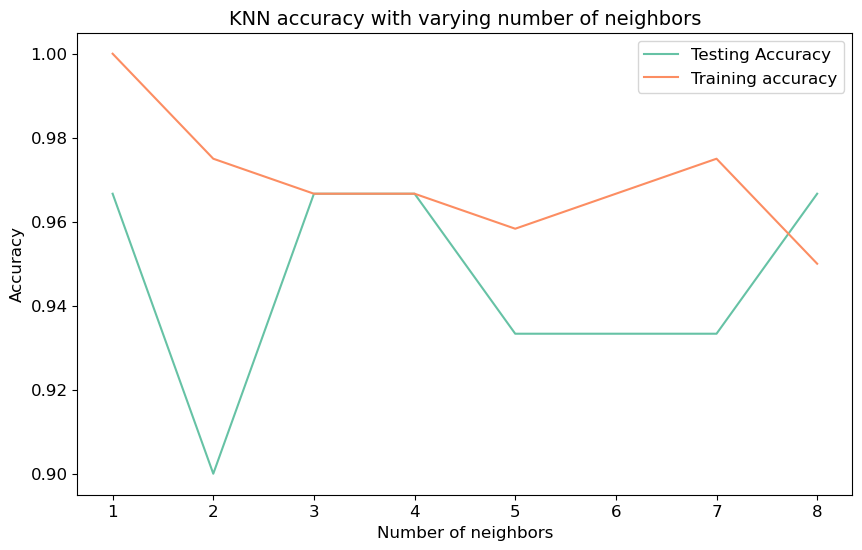

In [53]:
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 14)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 12})
plt.xlabel('Number of neighbors',fontsize = 12)
plt.ylabel('Accuracy',fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

From the above graph, we can see that when "k = 3", both the model performs best. So, we will take k = 3 and re-run the training once again.

In [55]:
knn_model = KNeighborsClassifier(n_neighbors = 3)

#Fit the model
knn_model.fit(X_train, y_train)

#Compute accuracy on the training set
train_accuracy = knn_model.score(X_train, y_train)

#Compute accuracy on the test set
test_accuracy = knn_model.score(X_test, y_test)

In [56]:
# Make predictions with the trained model
knn_model_pred = knn_model.predict(X_test)

In [57]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, knn_model_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


# 4. Model Evaluation

Storing the model predictions in a dictionary; this makes it easier to iterate through each model and print the result

In [60]:
# checking the score of the predictions against the actual values in the test set
model_preds = {
    "Logistic Regression": lr_model_pred,
    "Support Vector Machine": svm_model_pred,
    "Random Forest Classification": rf_model_pred,
    "K-Nearest Neighbor": knn_model_pred
}

for model, pred in model_preds.items():
    print(f"{model} Results:\n{classification_report(y_test, pred)}", sep = "\n\n")

Logistic Regression Results:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Support Vector Machine Results:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Random Forest Classification Results:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00   

From the above result, we can observe that the Logistic Regression and Support Vector Machine Model works best compared to the rest of the models.

**Confusion Matrix**

We want to evaluate the quality of the output of the classifier on the test data by using a confusion matrix.

Logistic Regression Confusion Matrix: 


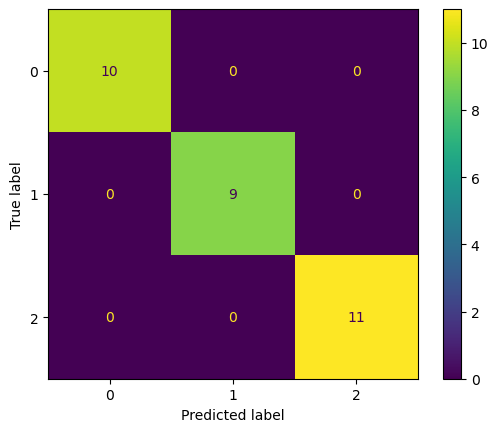

In [64]:
# Logistic Regression Confusion Matrix
print("Logistic Regression Confusion Matrix: \n", ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, lr_model_pred)).plot());

SVM Confusion Matrix: 


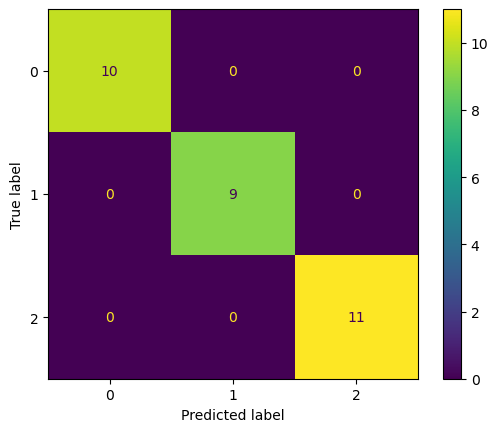

In [65]:
# Support Vector Machine Confusion Matrix
print("SVM Confusion Matrix: \n", ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, svm_model_pred)).plot());

Random Forest Classification Confusion Matrix: 


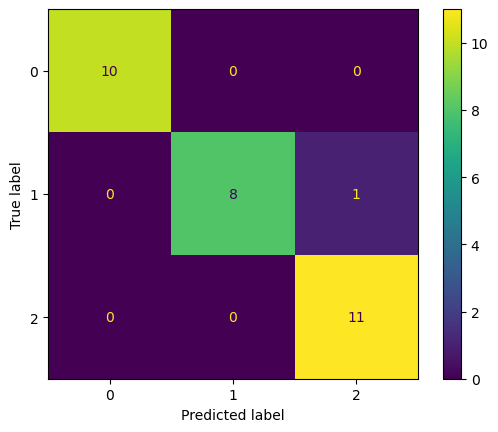

In [66]:
# Random Forest Classification Confusion Matrix
print("Random Forest Classification Confusion Matrix: \n", ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, rf_model_pred)).plot());

KNN Confusion Matrix: 


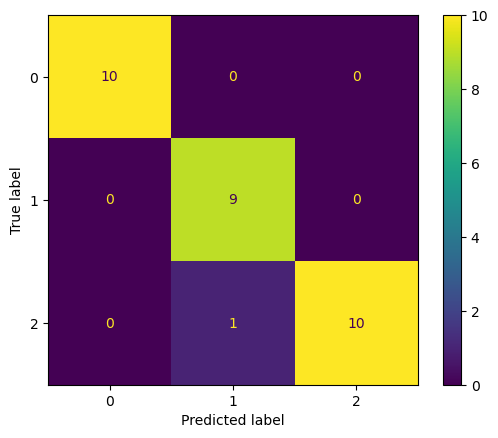

In [67]:
# K-Nearest Neighbor Confusion Matrix
print("KNN Confusion Matrix: \n", ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, knn_model_pred)).plot());

From each visualization, we can observe values at the side of the visualization: **0 - setosa**, **1 - versicolor** and **2 - virginica**.

In all the four visualization, the diagonal values for virginica amd itself is high compared to any other diagonal values which indicates that there are many correct predictions.

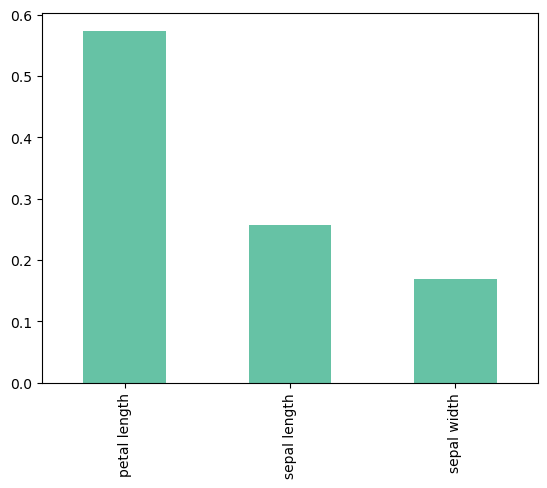

In [69]:
# Visualization to determine the importance of each feature
# Creating a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns).sort_values(ascending = False)

# Plotting a Bar char
feature_importances.plot.bar();

This means that the "petal length" was the biggest predictor of whether the flower was a setosa, virginica or versicolor.

# 5. Model Deployment

At this junction, we want to save our model and load it for other teams or people to use it for classification.

In [73]:
# Deploying the Logistic Regression Model
# Saving the model
joblib.dump(lr_model, 'logreg_model.pkl')

# Loading the model
loaded_model = joblib.load('logreg_model.pkl')

In [74]:
# Deploying the SVM Model
# Saving the model
joblib.dump(svm_model, 'svm_model.pkl')
   
# Loading the model
loaded_model = joblib.load('svm_model.pkl')